## Final Project - Random Forest Classifier

### 0. Import libraries

In [1]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score

### 1. Loading data

In [3]:
# Read the csv file
data = pd.read_csv('../data/clean_data/clean_data.csv')
data.head()

,air_time1,disp_index1,gmrt_in_air1,gmrt_on_paper1,max_x_extension1,max_y_extension1,mean_acc_in_air1,mean_acc_on_paper1,mean_gmrt1,mean_jerk_in_air1,...,mean_jerk_in_air25,mean_jerk_on_paper25,mean_speed_in_air25,mean_speed_on_paper25,num_of_pendown25,paper_time25,pressure_mean25,pressure_var25,total_time25,class
0,5160,0.000013,120.804174,86.853334,957,6601,0.361800,0.217459,103.828754,0.051836,...,0.141434,0.024471,5.596487,3.184589,71,40120,1749.278166,296102.7676,144605,1
1,51980,0.000016,115.318238,83.448681,1694,6998,0.272513,0.144880,99.383459,0.039827,...,0.049663,0.018368,1.665973,0.950249,129,126700,1504.768272,278744.2850,298640,1
2,2600,0.000010,229.933997,172.761858,2333,5802,0.387020,0.181342,201.347928,0.064220,...,0.178194,0.017174,4.000781,2.392521,74,45480,1431.443492,144411.7055,79025,1
3,2130,0.000010,369.403342,183.193104,1756,8159,0.556879,0.164502,276.298223,0.090408,...,0.113905,0.019860,4.206746,1.613522,123,67945,1465.843329,230184.7154,181220,1
4,2310,0.000007,257.997131,111.275889,987,4732,0.266077,0.145104,184.636510,0.037528,...,0.121782,0.020872,3.319036,1.680629,92,37285,1841.702561,158290.0255,72575,1


In [4]:
data.shape

(174, 451)

### 2. Random Forest Classifier

In [5]:
#Train test split

y = data['class']
X = data.drop(['class'], axis=1)
print(y.shape, X.shape)

(174,) (174, 450)


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((130, 450), (44, 450), (130,), (44,))

In [7]:
#Create and fit our random forest classifier model

clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [8]:
#Make predictions for train
y_train_pred = clf.predict(X_train)

In [9]:
#Make predictions for test
y_pred_test = clf.predict(X_test)

#### - Evaluation of the model with the confusion matrix

In [10]:
# Display the number of instances for each class, P=1 or H=0
display(y_test.value_counts())

1    23
0    21
Name: class, dtype: int64

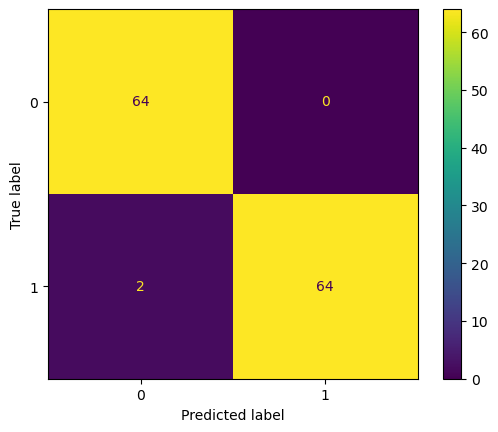

In [11]:
#Display confusion matrix for train data
cm_train = confusion_matrix(y_train, y_train_pred)
disp = ConfusionMatrixDisplay(cm_train, display_labels=clf.classes_)
disp.plot()
plt.show()

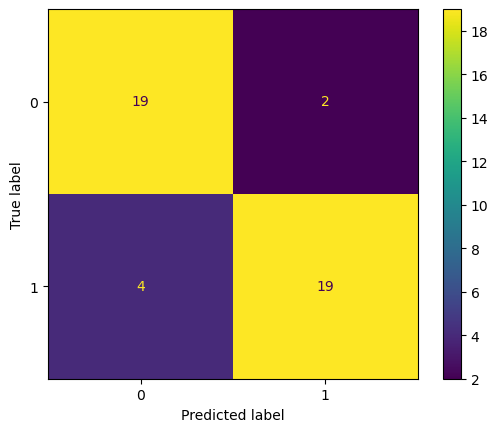

In [12]:
#Now for test
cm_test = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(cm_test, display_labels=clf.classes_)
disp.plot()
plt.show()

In [13]:
print("The accuracy of the model in the TRAIN set is: {:.2f}".format(clf.score(X_train, y_train)))
print("The accuracy of the model in the TEST set is: {:.2f}".format(clf.score(X_test, y_test)))

The accuracy of the model in the TRAIN set is: 0.98
The accuracy of the model in the TEST set is: 0.86


In [14]:
print("The accuracy in the TEST set is: {:.2f}".format(accuracy_score(y_test,y_pred_test)))
print("The precision in the TEST set is: {:.2f}".format(precision_score(y_test,y_pred_test)))
print("The recall in the TEST set is: {:.2f}".format(recall_score(y_test,y_pred_test)))
print("The F1 in the TEST set is: {:.2f}".format(f1_score(y_test,y_pred_test)))
print("The Kappa in the TEST set is: {:.2f}".format(cohen_kappa_score(y_test,y_pred_test)))

The accuracy in the TEST set is: 0.86
The precision in the TEST set is: 0.90
The recall in the TEST set is: 0.83
The F1 in the TEST set is: 0.86
The Kappa in the TEST set is: 0.73


#### -Cross validate

In [15]:
from sklearn.model_selection import cross_validate

clf = RandomForestClassifier(max_depth=2, random_state=0)
results = cross_validate(clf, X_train, y_train, cv=10, scoring=['accuracy', 'recall'], return_train_score=True)

In [16]:
results

{'fit_time': array([0.55223989, 0.53081131, 0.51878834, 0.55072045, 0.52750635,
        0.53757763, 0.54170251, 0.53467393, 0.52976322, 0.57498479]),
 'score_time': array([0.0415566 , 0.03969264, 0.03944278, 0.04150486, 0.03222418,
        0.03974795, 0.03799844, 0.04000831, 0.04018497, 0.04944372]),
 'test_accuracy': array([0.84615385, 1.        , 0.76923077, 0.92307692, 0.76923077,
        0.84615385, 0.84615385, 0.69230769, 0.84615385, 0.92307692]),
 'train_accuracy': array([0.96581197, 0.99145299, 0.98290598, 0.98290598, 0.96581197,
        0.96581197, 0.98290598, 0.97435897, 0.98290598, 1.        ]),
 'test_recall': array([1.        , 1.        , 0.66666667, 0.83333333, 0.71428571,
        1.        , 0.71428571, 0.85714286, 1.        , 0.85714286]),
 'train_recall': array([0.96666667, 0.98333333, 0.96666667, 0.98333333, 0.96610169,
        0.96610169, 0.96610169, 0.96610169, 0.98305085, 1.        ])}

In [17]:
print(f'The mean train accuracy is: {np.mean(results["train_accuracy"])}')
print(f'The mean train recall is: {np.mean(results["train_recall"])}')
print(f'The mean test accuracy is: {np.mean(results["test_accuracy"])}')
print(f'The mean test recall is: {np.mean(results["test_recall"])}')

The mean train accuracy is: 0.9794871794871796
The mean train recall is: 0.9747457627118644
The mean test accuracy is: 0.8461538461538461
The mean test recall is: 0.8642857142857142


### 3. Hyperparameter tuning

In [18]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'n_estimators': [5, 10, 20, 50, 100],
    'bootstrap': [True, False],
    'min_samples_split': [2, 4],
    'min_samples_leaf' : [1, 2],
    }

In [19]:
import os

n_cpu = os.cpu_count()
print("Number of CPUs in the system:", n_cpu)

Number of CPUs in the system: 8


In [20]:
clf = RandomForestClassifier(random_state=100)

grid_search = GridSearchCV(clf, param_grid, cv=5, return_train_score=True, n_jobs=6)
grid_search.fit(X_train,y_train)
grid_search.best_params_

{'bootstrap': False,
 'max_depth': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 20}

In [21]:
grid_search.best_score_

0.9153846153846154

In [22]:
clf = RandomForestClassifier(max_depth=3, random_state=47, min_samples_leaf=1, min_samples_split=2, n_estimators=20)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=20, random_state=47)

0.9923076923076923 0.9318181818181818


1    23
0    21
Name: class, dtype: int64

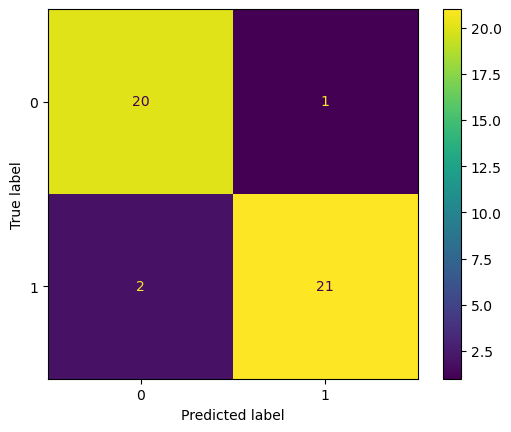

In [24]:
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train), clf.score(X_test, y_test))

y_pred = clf.predict(X_test)
display(y_test.value_counts())

cm_train = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm_train, display_labels=clf.classes_)
disp.plot()
plt.show()

In [25]:
print("The accuracy in the TEST set is: {:.2f}".format(accuracy_score(y_test,y_pred)))
print("The precision in the TEST set is: {:.2f}".format(precision_score(y_test,y_pred)))
print("The recall in the TEST set is: {:.2f}".format(recall_score(y_test,y_pred)))
print("The F1 in the TEST set is: {:.2f}".format(f1_score(y_test,y_pred)))
print("The Kappa in the TEST set is: {:.2f}".format(cohen_kappa_score(y_test,y_pred)))

The accuracy in the TEST set is: 0.93
The precision in the TEST set is: 0.95
The recall in the TEST set is: 0.91
The F1 in the TEST set is: 0.93
The Kappa in the TEST set is: 0.86


### 4. Conclusions

After conducting a hyperparameter tuning with a grid search, it was obtained that the following combination of parameters is the best: 

- **bootstrap = False**  
Suggests that the model, being trained without this resampling technique, has sufficiently large and varied data to not require sampling with replacement. With this, each tree is trained with the complete data set, having more varied trees.

- **max_depth = 3**  
The max depth of 3 indicates that the individual trees in the Random Forest are not very deep. This helps prevent overfitting and promotes better performance on unseen data.

- **min_samples_leaf = 1 & min_samples_split = 2**  
These values indicates that the model focuses on node purity, ensuring that splits are performed only when there is at least one example on a leaf and at least two examples on a node before performing a split.

- **n_estimators = 20**  
Using 20 trees in the forest indicates that you are avoiding excessive complexity and preferring a relatively small set of trees, which may be enough to obtain good performance.

Additionally, with 20 estimators and relatively shallow trees, model training time should be relatively efficient compared to more complex setups.

With these parameters the metrics that were obtained are the following: 

The `accuracy` in the TEST set is: **0.93**  
The `precision` in the TEST set is: **0.95**  
The `recall` in the TEST set is: **0.91**  
The `F1` in the TEST set is: **0.93**  
The `Kappa` in the TEST set is: **0.86** 


Finally, in addition to the <u>accuracy</u>, <u>precision</u> and <u>recall</u>, they tell us that the model's predictions are more than 90% correct, that when the model predicts true positives it has few type I errors (false positives), that the model largely identifies all positive cases having few type II errors (false negatives), respectively, the F1-Score indicates a good balance between precision and recall, and the Kappa Score indicates a very good agreement between the model predictions and the real classifications, that is, the model does not predict the classes in an equivalent way as chance would.